# ENVPHYS 200 - Magnetic data lab

**Objective:** In this lab you will read, plot and filter magnetic data from a station in a volcano in Alaska.

https://www.fdsn.org/about/ explains what is FDSN (International Federation of Digital Seismograph Networks). Originally designed for seismic networks, you can get seismic data from around the globe. For example, IRIS is a consortium with an FDSN server. We will first install **obspy** which allows us to retrieve data from the web and work with it.

In [1]:
!pip install obspy
!pip install cartopy # to add plotting of maps in some of the obspy modules

Note there is mention of obspy. This is the software that helps you download, process and display the time series from FDSN servers. Have a look here to read about obspy: https://docs.obspy.org/tutorial/index.html.

FDSN provides you with a time series. The metadata tells you what the time series means. You can convert to the actual units of what is recorded, for example, with the metadata. 

A seismogram is measured in metres of ground displacement.

To give you an important example of the modules in obspy, read the UTCDateTime page of the tutorial, because we are going to use it next to look at a seismogram:

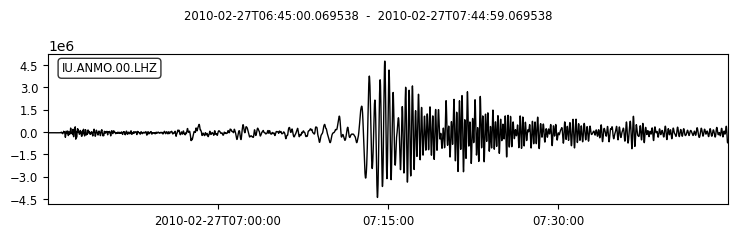

In [3]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

client = Client("IRIS") # this is the (fdsn) server where we get the data

t = UTCDateTime("2010-02-27T06:45:00.000")
st = client.get_waveforms(network="IU", station="ANMO", location="00", channel="LHZ", starttime=t, endtime=t + 60 * 60) # time is in seconds.
st.plot(); ## The semi-colon is a trick to avoid a bug of getting two graphs plotting the same data

To understand what is happening here, you need to read:

https://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.get_waveforms.html


In particular you need to understand what the letters in **channel** mean, look at  https://ds.iris.edu/ds/nodes/dmc/data/formats/seed-channel-naming/

## QUESTION 1

What data is in a channel called "MKD"?


FDSN servers around the world host all kinds of data. For example, there is a network of magnetometers led by Columbia University, with the data hosted on the IRIS server:
https://avert.ldeo.columbia.edu/magnetometry/ has a lot of info on magnetometry. In the following cell we download an inventory of the network that contains magnetometers.


Inventory created at 2023-10-18T21:37:40.111200Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?network=AV&channel=LFZ
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			AV
		Stations (4):
			AV.CLNE (Cleveland Northeast, Cleveland Volcano, Alaska)
			AV.CLSF (Cleveland South Flank, Cleveland Volcano, Alaska)
			AV.OKBR (Big Rock, Okmok Caldera, Alaska)
			AV.OKWE (Weeping Wall, Okmok Caldera, Alaska)
		Channels (0):



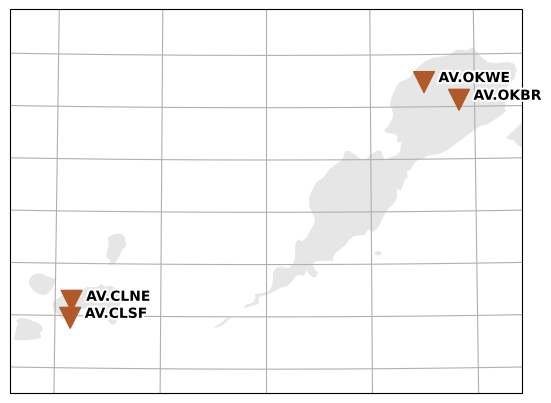

In [4]:
inv = client.get_stations(network='AV',channel='LFZ')
print(inv)
inv.plot(projection='local');

Now that you understand reading FDSN data, **Write a code below that will read/plot  data from the IRIS repository from a magnetometer station**.
Adjust the code to download and plot a seismogram to plot 1 month of magnetometer data from station CLNE from 2022. 

In [ ]:
## write your code here


If all is well, you have a plot of a time series associated with the magnetometer CLNE. However, the y-axis is in arbitrary units. To turn the y-axis in to the SI unit of magnetic field strength, rewrite your code that download and plots the magnetic data with two additions:

1. between the brackets in the get_waveforms() command, add another argument: attach_response=True
2. after getting your stream st that way, write a new line: st.remove_sensitivity()
3. plot as usual, but notice the different values on the y-axis. These are now in the SI unit. 

## Question 2 
What is the unit for magnetic field strength on the y-axis? Do the values match what you learned in class this week? 

## Filtering

Apply a **lowpass** filter on the series with frequencies  $<$ 1e-5 Hz, and plot. In the code below you can see how you filter out the DC component in the data first. Read the obspy documentation

https://docs.obspy.org/tutorial/code_snippets/filtering_seismograms.html

on how to filter.

The examples at the end are very useful.

In [ ]:
stfilt = st.copy() # make a copy of the original data so that you can use othe filters on the same dataset, later
stfilt.detrend() # removes the DC noise component in your data; this is needed to filter

## Write your filter below


## QUESTION 3

What is producing trends in the magnetic data with frequencies on the order of 0.00001 Hz? Explain in the markdown cell below:


## QUESTION 4

Filter and plot the Earth's magentic data below 1e-6 Hz. 


In [ ]:
stfilt2 = st.copy() # make a copy of the original data so that you can use othe filters on the same dataset, later
stfilt2.detrend() # removes the DC noise component in your data; this is needed to filter

## Write your filter below:


What is producing this low frequency temporal change in the magnetic field?

## BONUS QUESTION

Can you plot FDSN data for a buoy that measures the depth of the water in the Waitematā harbour? What is causing the variations in these data?

(If you take ENVPHYS 300, you will use these data)

*Hint*: Much of New Zealand's environmental data is managed by GEONET. Search for the buoy on their website, find the network and the channel, then use what you learned today to download and plot the data.

In [ ]:
# insert your code here